In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('base_rf.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.loc[:,'y'] = df.y.replace('no',0).replace('yes',1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [4]:
X = df.drop('y',axis=1)
y = df.y

In [5]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.3)

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

# X_tr_o = X_tr.copy()
# X_ts_o = X_ts.copy()

# tipos_cat = {}
# for col,dtype in X_tr_o.dtypes.items():
#     if dtype=='object':
#         tipos_cat[col] = pd.CategoricalDtype(categories=X_tr_o[col].unique)
#         X_tr_o.loc[:,col] = X_tr_o[col].astype(tipos_cat[col])
#         X_ts_o.loc[:,col] = X_ts_o[col].astype(tipos_cat[col])
    
# X_tr_o

In [6]:
from sklearn.preprocessing import OrdinalEncoder

X_tr_o = X_tr.copy()
X_ts_o = X_ts.copy()

encoders = {}
for col,dtype in X_tr_o.dtypes.items():
    if dtype=='object':
        encoders[col] = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        X_tr_o.loc[:,col] = encoders[col].fit_transform(X_tr_o[[col]])
        X_ts_o.loc[:,col] = encoders[col].transform(X_ts_o[[col]])
    
X_tr_o

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
24915,33,2.0,2.0,6.0,0.0,2.0,0.0,0.0,7.0,3.0,4,999,0,1.0,-0.1,93.200,-42.0,4.153,5195.8
7689,27,0.0,1.0,2.0,0.0,2.0,0.0,1.0,6.0,0.0,2,999,0,1.0,1.1,93.994,-36.4,4.864,5191.0
27192,45,7.0,2.0,3.0,1.0,2.0,0.0,0.0,7.0,0.0,1,999,0,1.0,-0.1,93.200,-42.0,4.021,5195.8
23015,49,0.0,1.0,6.0,0.0,0.0,0.0,0.0,1.0,3.0,5,999,0,1.0,1.4,93.444,-36.1,4.965,5228.1
8494,44,0.0,1.0,6.0,0.0,2.0,0.0,1.0,4.0,4.0,1,999,0,1.0,1.4,94.465,-41.8,4.864,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40151,23,1.0,2.0,2.0,0.0,2.0,0.0,0.0,3.0,2.0,5,999,1,0.0,-1.7,94.215,-40.3,0.846,4991.6
14459,42,6.0,0.0,1.0,1.0,2.0,0.0,0.0,3.0,3.0,3,999,0,1.0,1.4,93.918,-42.7,4.961,5228.1
26352,38,4.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,2.0,1,999,0,1.0,-0.1,93.200,-42.0,4.076,5195.8
8290,43,10.0,1.0,5.0,0.0,0.0,0.0,1.0,4.0,3.0,5,999,0,1.0,1.4,94.465,-41.8,4.864,5228.1


In [7]:
X_tr_o

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
24915,33,2.0,2.0,6.0,0.0,2.0,0.0,0.0,7.0,3.0,4,999,0,1.0,-0.1,93.200,-42.0,4.153,5195.8
7689,27,0.0,1.0,2.0,0.0,2.0,0.0,1.0,6.0,0.0,2,999,0,1.0,1.1,93.994,-36.4,4.864,5191.0
27192,45,7.0,2.0,3.0,1.0,2.0,0.0,0.0,7.0,0.0,1,999,0,1.0,-0.1,93.200,-42.0,4.021,5195.8
23015,49,0.0,1.0,6.0,0.0,0.0,0.0,0.0,1.0,3.0,5,999,0,1.0,1.4,93.444,-36.1,4.965,5228.1
8494,44,0.0,1.0,6.0,0.0,2.0,0.0,1.0,4.0,4.0,1,999,0,1.0,1.4,94.465,-41.8,4.864,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40151,23,1.0,2.0,2.0,0.0,2.0,0.0,0.0,3.0,2.0,5,999,1,0.0,-1.7,94.215,-40.3,0.846,4991.6
14459,42,6.0,0.0,1.0,1.0,2.0,0.0,0.0,3.0,3.0,3,999,0,1.0,1.4,93.918,-42.7,4.961,5228.1
26352,38,4.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,2.0,1,999,0,1.0,-0.1,93.200,-42.0,4.076,5195.8
8290,43,10.0,1.0,5.0,0.0,0.0,0.0,1.0,4.0,3.0,5,999,0,1.0,1.4,94.465,-41.8,4.864,5228.1


In [8]:
X_tr_o.dtypes

age                 int64
job               float64
marital           float64
education         float64
default           float64
housing           float64
loan              float64
contact           float64
month             float64
day_of_week       float64
campaign            int64
pdays               int64
previous            int64
poutcome          float64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [9]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3,5,7,9,11],
    'n_estimators':[50,100,150,200],
    'learning_rate': [0.05,0.1,0.2],
    'reg_alpha': [0,0.1,0.5],
    #'reg_lambda': [0,0.1,0.5],
}

lgbm = GridSearchCV(
    LGBMClassifier(n_estimators=500, random_state=61658, n_jobs=2),
    params,
    cv=5,
    scoring='roc_auc',
    verbose=10,
)
lgbm.fit(X_tr_o,y_tr)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 1/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.2s
[CV 2/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 2/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.2s
[CV 3/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 3/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.1s
[CV 4/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 4/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.2s
[CV 5/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 5/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.2s
[CV 1/5

[CV 4/5; 9/180] END learning_rate=0.05, max_depth=3, n_estimators=150, reg_alpha=0.5; total time=   0.3s
[CV 5/5; 9/180] START learning_rate=0.05, max_depth=3, n_estimators=150, reg_alpha=0.5
[CV 5/5; 9/180] END learning_rate=0.05, max_depth=3, n_estimators=150, reg_alpha=0.5; total time=   0.3s
[CV 1/5; 10/180] START learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0
[CV 1/5; 10/180] END learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.3s
[CV 2/5; 10/180] START learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0
[CV 2/5; 10/180] END learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.3s
[CV 3/5; 10/180] START learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0
[CV 3/5; 10/180] END learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.5s
[CV 4/5; 10/180] START learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0
[CV 4/5; 10/180] END learning_rate=0.05, max_de

[CV 2/5; 18/180] END learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5; total time=   0.4s
[CV 3/5; 18/180] START learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5
[CV 3/5; 18/180] END learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5; total time=   0.4s
[CV 4/5; 18/180] START learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5
[CV 4/5; 18/180] END learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5; total time=   0.4s
[CV 5/5; 18/180] START learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5
[CV 5/5; 18/180] END learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5; total time=   0.3s
[CV 1/5; 19/180] START learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0
[CV 1/5; 19/180] END learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.4s
[CV 2/5; 19/180] START learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0
[CV 2/5; 19/180] END learning_rate=0

[CV 5/5; 26/180] END learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.1; total time=   0.5s
[CV 1/5; 27/180] START learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 1/5; 27/180] END learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   0.6s
[CV 2/5; 27/180] START learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 2/5; 27/180] END learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   0.5s
[CV 3/5; 27/180] START learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 3/5; 27/180] END learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   0.4s
[CV 4/5; 27/180] START learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 4/5; 27/180] END learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   0.6s
[CV 5/5; 27/180] START learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 5/5; 27/180] END learning_rate=0.05,

[CV 3/5; 35/180] END learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1; total time=   1.3s
[CV 4/5; 35/180] START learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1
[CV 4/5; 35/180] END learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1; total time=   1.4s
[CV 5/5; 35/180] START learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1
[CV 5/5; 35/180] END learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1; total time=   1.1s
[CV 1/5; 36/180] START learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 1/5; 36/180] END learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   1.3s
[CV 2/5; 36/180] START learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 2/5; 36/180] END learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   1.2s
[CV 3/5; 36/180] START learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 3/5; 36/180] END learning_

[CV 1/5; 44/180] END learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   1.6s
[CV 2/5; 44/180] START learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1
[CV 2/5; 44/180] END learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   1.8s
[CV 3/5; 44/180] START learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1
[CV 3/5; 44/180] END learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   0.9s
[CV 4/5; 44/180] START learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1
[CV 4/5; 44/180] END learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   1.0s
[CV 5/5; 44/180] START learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1
[CV 5/5; 44/180] END learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   0.9s
[CV 1/5; 45/180] START learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 1/5; 45/180] END learning_

[CV 4/5; 52/180] END learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0; total time=   0.8s
[CV 5/5; 52/180] START learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0
[CV 5/5; 52/180] END learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0; total time=   0.9s
[CV 1/5; 53/180] START learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 1/5; 53/180] END learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   0.9s
[CV 2/5; 53/180] START learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 2/5; 53/180] END learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   0.8s
[CV 3/5; 53/180] START learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 3/5; 53/180] END learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   0.6s
[CV 4/5; 53/180] START learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 4/5; 53/180] END learn

[CV 2/5; 61/180] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.3s
[CV 3/5; 61/180] START learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0
[CV 3/5; 61/180] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.4s
[CV 4/5; 61/180] START learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0
[CV 4/5; 61/180] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.3s
[CV 5/5; 61/180] START learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0
[CV 5/5; 61/180] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.4s
[CV 1/5; 62/180] START learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 1/5; 62/180] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.5s
[CV 2/5; 62/180] START learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 2/5; 62/180] END learning_rate=0.1, max_depth=3, n_estimator

[CV 1/5; 70/180] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.6s
[CV 2/5; 70/180] START learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0
[CV 2/5; 70/180] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.8s
[CV 3/5; 70/180] START learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0
[CV 3/5; 70/180] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0; total time=   1.1s
[CV 4/5; 70/180] START learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0
[CV 4/5; 70/180] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.9s
[CV 5/5; 70/180] START learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0
[CV 5/5; 70/180] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0; total time=   1.0s
[CV 1/5; 71/180] START learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1
[CV 1/5; 71/180] END learning_rate=0.1, max_depth=3, n_est

[CV 5/5; 78/180] END learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.5; total time=   0.6s
[CV 1/5; 79/180] START learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0
[CV 1/5; 79/180] END learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.9s
[CV 2/5; 79/180] START learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0
[CV 2/5; 79/180] END learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.7s
[CV 3/5; 79/180] START learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0
[CV 3/5; 79/180] END learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.7s
[CV 4/5; 79/180] START learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0
[CV 4/5; 79/180] END learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.9s
[CV 5/5; 79/180] START learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0
[CV 5/5; 79/180] END learning_rate=0.1, max_depth=5, n_est

[CV 4/5; 87/180] END learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   0.4s
[CV 5/5; 87/180] START learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 5/5; 87/180] END learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   0.4s
[CV 1/5; 88/180] START learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0
[CV 1/5; 88/180] END learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0; total time=   0.7s
[CV 2/5; 88/180] START learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0
[CV 2/5; 88/180] END learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0; total time=   0.8s
[CV 3/5; 88/180] START learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0
[CV 3/5; 88/180] END learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0; total time=   0.6s
[CV 4/5; 88/180] START learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0
[CV 4/5; 88/180] END learning_rate=0.1, max_depth=7, n_es

[CV 2/5; 96/180] END learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   2.0s
[CV 3/5; 96/180] START learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 3/5; 96/180] END learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   1.1s
[CV 4/5; 96/180] START learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 4/5; 96/180] END learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   1.3s
[CV 5/5; 96/180] START learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 5/5; 96/180] END learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   1.0s
[CV 1/5; 97/180] START learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0
[CV 1/5; 97/180] END learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0; total time=   0.4s
[CV 2/5; 97/180] START learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0
[CV 2/5; 97/180] END learning_rate=0.1, max_depth

[CV 5/5; 104/180] END learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   0.9s
[CV 1/5; 105/180] START learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 1/5; 105/180] END learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   0.9s
[CV 2/5; 105/180] START learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 2/5; 105/180] END learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   0.9s
[CV 3/5; 105/180] START learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 3/5; 105/180] END learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   0.8s
[CV 4/5; 105/180] START learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 4/5; 105/180] END learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   0.8s
[CV 5/5; 105/180] START learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 5/5; 105/180] END learning

[CV 3/5; 113/180] END learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   1.0s
[CV 4/5; 113/180] START learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 4/5; 113/180] END learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   0.8s
[CV 5/5; 113/180] START learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 5/5; 113/180] END learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   0.7s
[CV 1/5; 114/180] START learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 1/5; 114/180] END learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   0.7s
[CV 2/5; 114/180] START learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 2/5; 114/180] END learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   0.5s
[CV 3/5; 114/180] START learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 3/5; 114/180] EN

[CV 1/5; 122/180] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.9s
[CV 2/5; 122/180] START learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 2/5; 122/180] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.6s
[CV 3/5; 122/180] START learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 3/5; 122/180] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.4s
[CV 4/5; 122/180] START learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 4/5; 122/180] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.4s
[CV 5/5; 122/180] START learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 5/5; 122/180] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.3s
[CV 1/5; 123/180] START learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5
[CV 1/5; 123/180] END learning_rate=0.2,

[CV 4/5; 130/180] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0; total time=   1.2s
[CV 5/5; 130/180] START learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0
[CV 5/5; 130/180] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.8s
[CV 1/5; 131/180] START learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1
[CV 1/5; 131/180] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1; total time=   0.8s
[CV 2/5; 131/180] START learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1
[CV 2/5; 131/180] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1; total time=   1.2s
[CV 3/5; 131/180] START learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1
[CV 3/5; 131/180] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1; total time=   1.4s
[CV 4/5; 131/180] START learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1
[CV 4/5; 131/180] END learning_rate=

[CV 2/5; 139/180] END learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.7s
[CV 3/5; 139/180] START learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0
[CV 3/5; 139/180] END learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.7s
[CV 4/5; 139/180] START learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0
[CV 4/5; 139/180] END learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.6s
[CV 5/5; 139/180] START learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0
[CV 5/5; 139/180] END learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.7s
[CV 1/5; 140/180] START learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0.1
[CV 1/5; 140/180] END learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0.1; total time=   0.8s
[CV 2/5; 140/180] START learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0.1
[CV 2/5; 140/180] END learning_rate=0.2, max

[CV 5/5; 147/180] END learning_rate=0.2, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   0.5s
[CV 1/5; 148/180] START learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0
[CV 1/5; 148/180] END learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0; total time=   0.8s
[CV 2/5; 148/180] START learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0
[CV 2/5; 148/180] END learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0; total time=   0.6s
[CV 3/5; 148/180] START learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0
[CV 3/5; 148/180] END learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0; total time=   1.0s
[CV 4/5; 148/180] START learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0
[CV 4/5; 148/180] END learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0; total time=   0.7s
[CV 5/5; 148/180] START learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0
[CV 5/5; 148/180] END learning_rate=0.2, max_dept

[CV 3/5; 156/180] END learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   1.4s
[CV 4/5; 156/180] START learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 4/5; 156/180] END learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   1.3s
[CV 5/5; 156/180] START learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 5/5; 156/180] END learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   1.3s
[CV 1/5; 157/180] START learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0
[CV 1/5; 157/180] END learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0; total time=   0.4s
[CV 2/5; 157/180] START learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0
[CV 2/5; 157/180] END learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0; total time=   0.4s
[CV 3/5; 157/180] START learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0
[CV 3/5; 157/180] END learning_rate=0.2, max_

[CV 1/5; 165/180] END learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   2.0s
[CV 2/5; 165/180] START learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 2/5; 165/180] END learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   1.4s
[CV 3/5; 165/180] START learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 3/5; 165/180] END learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   1.0s
[CV 4/5; 165/180] START learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 4/5; 165/180] END learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   1.0s
[CV 5/5; 165/180] START learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 5/5; 165/180] END learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   1.1s
[CV 1/5; 166/180] START learning_rate=0.2, max_depth=9, n_estimators=200, reg_alpha=0
[CV 1/5; 166/180] END learning_r

[CV 4/5; 173/180] END learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   1.1s
[CV 5/5; 173/180] START learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 5/5; 173/180] END learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   1.5s
[CV 1/5; 174/180] START learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 1/5; 174/180] END learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   0.6s
[CV 2/5; 174/180] START learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 2/5; 174/180] END learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   0.7s
[CV 3/5; 174/180] START learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 3/5; 174/180] END learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   0.9s
[CV 4/5; 174/180] START learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 4/5; 174/180] EN

GridSearchCV(cv=5,
             estimator=LGBMClassifier(n_estimators=500, n_jobs=2,
                                      random_state=61658),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [50, 100, 150, 200],
                         'reg_alpha': [0, 0.1, 0.5]},
             scoring='roc_auc', verbose=10)

In [10]:
lgbm.best_params_

{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50, 'reg_alpha': 0.5}

In [11]:
from sklearn.metrics import roc_auc_score

preds = lgbm.predict_proba(X_ts_o)[:,1]

roc_auc_score(y_ts,preds)

0.814362826644486

In [12]:
lgbm.best_estimator_.feature_importances_

array([209,  58,  28,  78,  24,  19,   1,  51,  87, 130, 153,  54,  37,
        44,  58, 101,  49, 269,  50], dtype=int32)

In [13]:
imps = lgbm.best_estimator_.feature_importances_
cols = X_tr_o.columns
order= np.argsort(imps)[::-1]

for col,imp in zip(cols[order],imps[order]):
    print(f'{col:30s} {imp:.2f}')

euribor3m                      269.00
age                            209.00
campaign                       153.00
day_of_week                    130.00
cons.price.idx                 101.00
month                          87.00
education                      78.00
emp.var.rate                   58.00
job                            58.00
pdays                          54.00
contact                        51.00
nr.employed                    50.00
cons.conf.idx                  49.00
poutcome                       44.00
previous                       37.00
marital                        28.00
default                        24.00
housing                        19.00
loan                           1.00


(array([0.76483516, 5.8       , 2.65567766, 1.27472527, 0.63736264,
        0.55238095, 0.44615385, 0.59487179, 1.6996337 , 2.33699634,
        1.25347985, 1.52967033, 1.04102564, 1.01978022, 0.84981685,
        0.87106227, 0.57362637, 0.97728938, 0.97728938, 0.67985348,
        0.57362637, 1.23223443, 0.65860806, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
        0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
        0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
        0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
        0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
        0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
 <BarContainer object of 29 artists>)

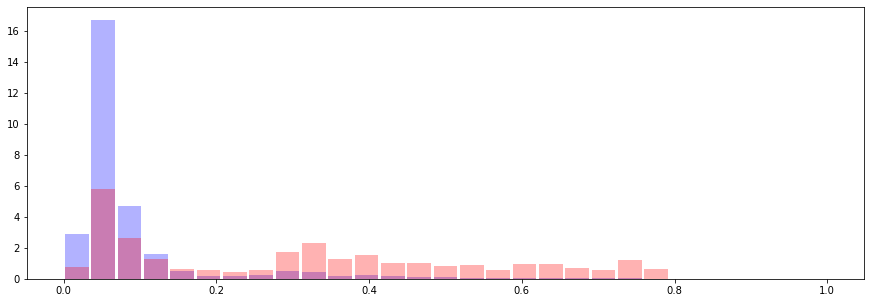

In [14]:
plt.figure(figsize=(15,5))
plt.hist(preds[y_ts==0], bins=np.linspace(0,1,30), density=True, color='b', alpha=.3, rwidth=.9)
plt.hist(preds[y_ts==1], bins=np.linspace(0,1,30), density=True, color='r', alpha=.3, rwidth=.9)

In [15]:
preds.min(),preds.max()

(0.028291589055519963, 0.78990347640446)

In [19]:
lgbm

GridSearchCV(cv=5,
             estimator=LGBMClassifier(n_estimators=500, n_jobs=2,
                                      random_state=61658),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [50, 100, 150, 200],
                         'reg_alpha': [0, 0.1, 0.5]},
             scoring='roc_auc', verbose=10)

In [18]:
lgbm.best_params_

{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50, 'reg_alpha': 0.5}

In [21]:
lgbm2 = LGBMClassifier(random_state=61658, n_jobs=1, class_weight='balanced', **lgbm.best_params_)
lgbm2.fit(X_tr_o, y_tr)

LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_depth=7,
               n_estimators=50, n_jobs=1, random_state=61658, reg_alpha=0.5)

In [22]:
preds = lgbm2.predict_proba(X_ts_o)[:,1]
preds

array([0.20329448, 0.26081278, 0.79829439, ..., 0.37777198, 0.3144591 ,
       0.72273448])

(array([0.        , 0.        , 0.        , 0.        , 0.16996337,
        0.59487179, 0.38241758, 0.91355311, 2.16703297, 1.21098901,
        1.57216117, 1.31721612, 0.65860806, 0.21245421, 0.63736264,
        0.63736264, 0.44615385, 0.2974359 , 0.21245421, 0.27619048,
        0.67985348, 0.93479853, 4.16410256, 2.82564103, 2.50695971,
        0.84981685, 5.33260073, 0.        , 0.        ]),
 array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
        0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
        0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
        0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
        0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
        0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
 <BarContainer object of 29 artists>)

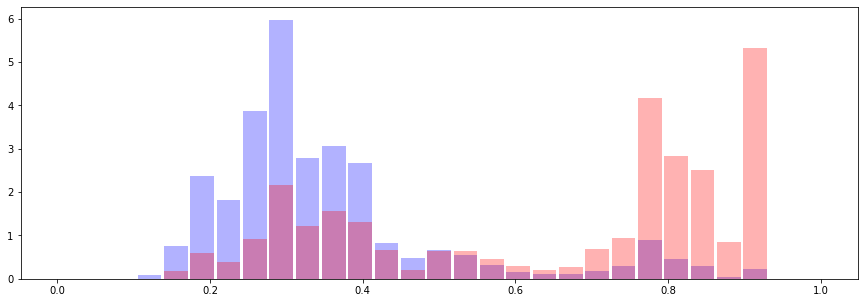

In [23]:
plt.figure(figsize=(15,5))
plt.hist(preds[y_ts==0], bins=np.linspace(0,1,30), density=True, color='b', alpha=.3, rwidth=.9)
plt.hist(preds[y_ts==1], bins=np.linspace(0,1,30), density=True, color='r', alpha=.3, rwidth=.9)

In [24]:
roc_auc_score(y_ts,preds)

0.8181133065139614